In [1]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans,DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
 

(-15, 15)

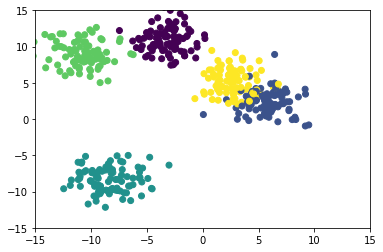

In [2]:
data = make_blobs(n_samples=450, n_features=2, centers=5, cluster_std=1.7, random_state=42, center_box=[-12,12])

points = data[0]

plt.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='viridis')
plt.xlim(-15,15)
plt.ylim(-15,15)

In [3]:

kmeans = KMeans(n_clusters=5)

kmeans.fit(points)

print(kmeans.cluster_centers_)

y_km = kmeans.fit_predict(points)

[[ -3.26660437  10.83543418]
 [ -8.3625683   -8.38984581]
 [  2.43662568   5.35811343]
 [-10.8487363    8.93716957]
 [  5.77588519   2.36840759]]


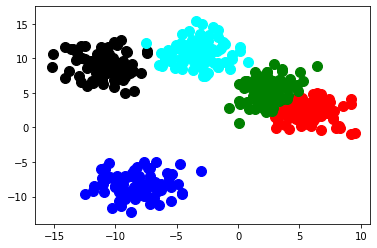

In [4]:
plt.scatter(points[y_km ==0,0], points[y_km == 0,1], s=100, c='red')
plt.scatter(points[y_km ==1,0], points[y_km == 1,1], s=100, c='black')
plt.scatter(points[y_km ==2,0], points[y_km == 2,1], s=100, c='blue')
plt.scatter(points[y_km ==3,0], points[y_km == 3,1], s=100, c='cyan')
plt.scatter(points[y_km ==4,0], points[y_km == 4,1], s=100, c='green')

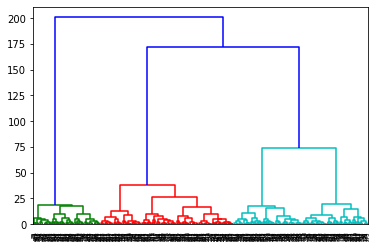

In [5]:
dendrogram = sch.dendrogram(sch.linkage(points, method='ward'))
# create clusters
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
y_hc = hc.fit_predict(points)

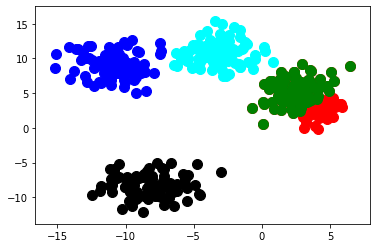

In [6]:
plt.scatter(points[y_hc ==0,0], points[y_hc == 0,1], s=100, c='red')
plt.scatter(points[y_hc==1,0], points[y_hc == 1,1], s=100, c='black')
plt.scatter(points[y_hc ==2,0], points[y_hc == 2,1], s=100, c='blue')
plt.scatter(points[y_hc ==3,0], points[y_hc == 3,1], s=100, c='cyan')
plt.scatter(points[y_km ==4,0], points[y_km == 4,1], s=100, c='green')

In [7]:
 
db = DBSCAN(eps=0.3, min_samples=10).fit(points) 
core_samples_mask = np.zeros_like(db.labels_, dtype=bool) 
core_samples_mask[db.core_sample_indices_] = True
labels = data[1]

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) 
  
print(labels) 
  


[4 2 4 0 1 1 4 4 3 3 2 3 0 3 2 4 3 1 3 2 3 4 3 2 3 1 2 2 0 0 0 3 4 1 4 1 2
 4 3 3 1 2 3 0 2 0 0 3 3 0 3 2 0 3 1 0 3 2 0 3 0 1 1 3 3 4 3 1 4 0 1 4 0 0
 3 2 3 2 1 1 3 2 0 1 4 2 0 1 0 3 2 3 4 2 1 4 2 0 3 2 4 2 4 2 4 3 4 1 2 2 1
 4 2 1 2 4 4 1 1 3 0 2 4 3 1 1 2 2 4 4 1 1 1 1 3 0 1 2 3 1 0 4 3 4 2 2 4 1
 1 0 1 0 0 1 0 0 2 0 0 3 3 0 4 3 4 4 3 3 0 3 3 0 2 3 3 0 2 1 0 2 2 4 4 4 3
 4 0 0 2 3 1 4 1 1 4 0 2 4 3 0 1 3 4 2 2 3 1 3 1 2 0 1 1 4 2 4 3 2 2 1 2 1
 0 3 1 1 2 2 2 3 2 0 3 1 1 0 1 0 1 4 1 2 1 2 0 0 0 3 2 0 1 2 1 1 1 2 0 4 3
 2 0 3 0 4 0 4 1 0 4 3 3 4 4 1 4 1 2 4 3 2 0 4 4 1 1 1 1 3 0 3 2 1 1 1 0 4
 4 2 0 4 2 1 1 4 0 0 1 3 0 0 0 1 3 2 1 3 2 3 0 0 3 1 4 4 3 3 2 2 0 4 1 2 4
 1 0 2 4 3 2 4 1 4 0 3 0 2 2 0 1 3 4 0 3 1 1 4 0 4 2 4 3 4 3 3 3 4 1 0 4 2
 1 2 4 3 3 0 1 2 3 2 0 4 0 4 1 3 4 0 1 4 4 3 0 1 0 4 2 0 0 0 4 1 0 4 0 0 4
 2 2 1 2 3 1 4 2 3 2 1 0 2 4 4 4 4 0 0 2 2 3 2 3 4 2 3 0 2 3 0 4 3 2 2 0 4
 3 1 4 3 4 2]


['y', 'b', 'g', 'r', 'c']


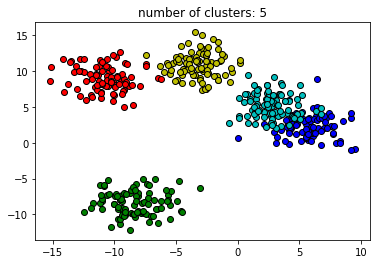

In [8]:

unique_labels = set(labels) 
colors = ['y', 'b', 'g', 'r','c'] 
print(colors) 
for k, col in zip(unique_labels, colors): 
    if k == -1: 
        # Black used for noise. 
        col = 'k'
  
    class_member_mask = (labels == k) 
  
    xy = points[class_member_mask & core_samples_mask] 
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k',markersize=6) 
  
    xy = points[class_member_mask & ~core_samples_mask] 
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6) 
  
plt.title('number of clusters: %d' %n_clusters_) 
plt.show()